In [5]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [8]:
# Cell 2: Load and Explore Data
# Markdown: Let's start by loading our dataset and taking a first look at it.

# Load the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'price']
budget_df = pd.read_csv('housing.csv', header=None, names=column_names, delim_whitespace=True)

# Display the first few rows of the dataset
print(budget_df.head())




      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


C:\Users\sagar rajak\AppData\Local\Temp\ipykernel_40608\1291183486.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  budget_df = pd.read_csv('housing.csv', header=None, names=column_names, delim_whitespace=True)


In [9]:
# Display the last few rows of the dataset
print("\nLast 5 rows of the dataset:")
print(budget_df.tail())



Last 5 rows of the dataset:
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  price  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  


In [10]:
# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(budget_df.info())



Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [11]:
# Display statistical summary of the dataset
print("\nStatistical summary of the dataset:")
budget_stats = budget_df.describe()
print(budget_stats)


Statistical summary of the dataset:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.

In [12]:
# Check for null values in the dataset
print("\nNull values in the dataset:")
print(budget_df.isnull().sum())

# Check for duplicate rows in the dataset
print("\nNumber of duplicate rows in the dataset:")
print(budget_df.duplicated().sum())


Null values in the dataset:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

Number of duplicate rows in the dataset:
0


In [13]:
# Cell 4: Correlation Analysis
# Analyze correlations between features and visualize them using a heatmap.

# Compute correlation matrix
corr_data = budget_df.corr()
print("\nCorrelation matrix:")
print(corr_data)


Correlation matrix:
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B      

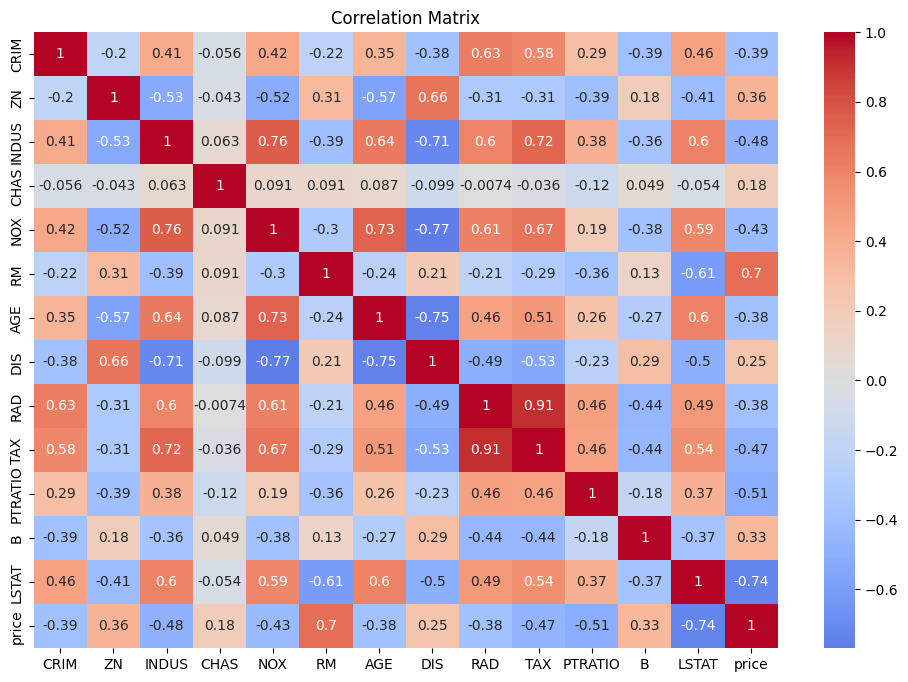

In [14]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [15]:

# Cell 5: Feature and Target Separation
# Separate the features and the target variable (price).

# Extract target variable (price)
budget_target = budget_df['price']
print("\nTarget variable (price):")
print(budget_target.head())





Target variable (price):
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64


In [16]:
# Drop the target variable from the dataset to create the feature set
budget_df = budget_df.drop('price', axis=1)
print("\nFeatures (excluding target variable):")
print(budget_df.head())


Features (excluding target variable):
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


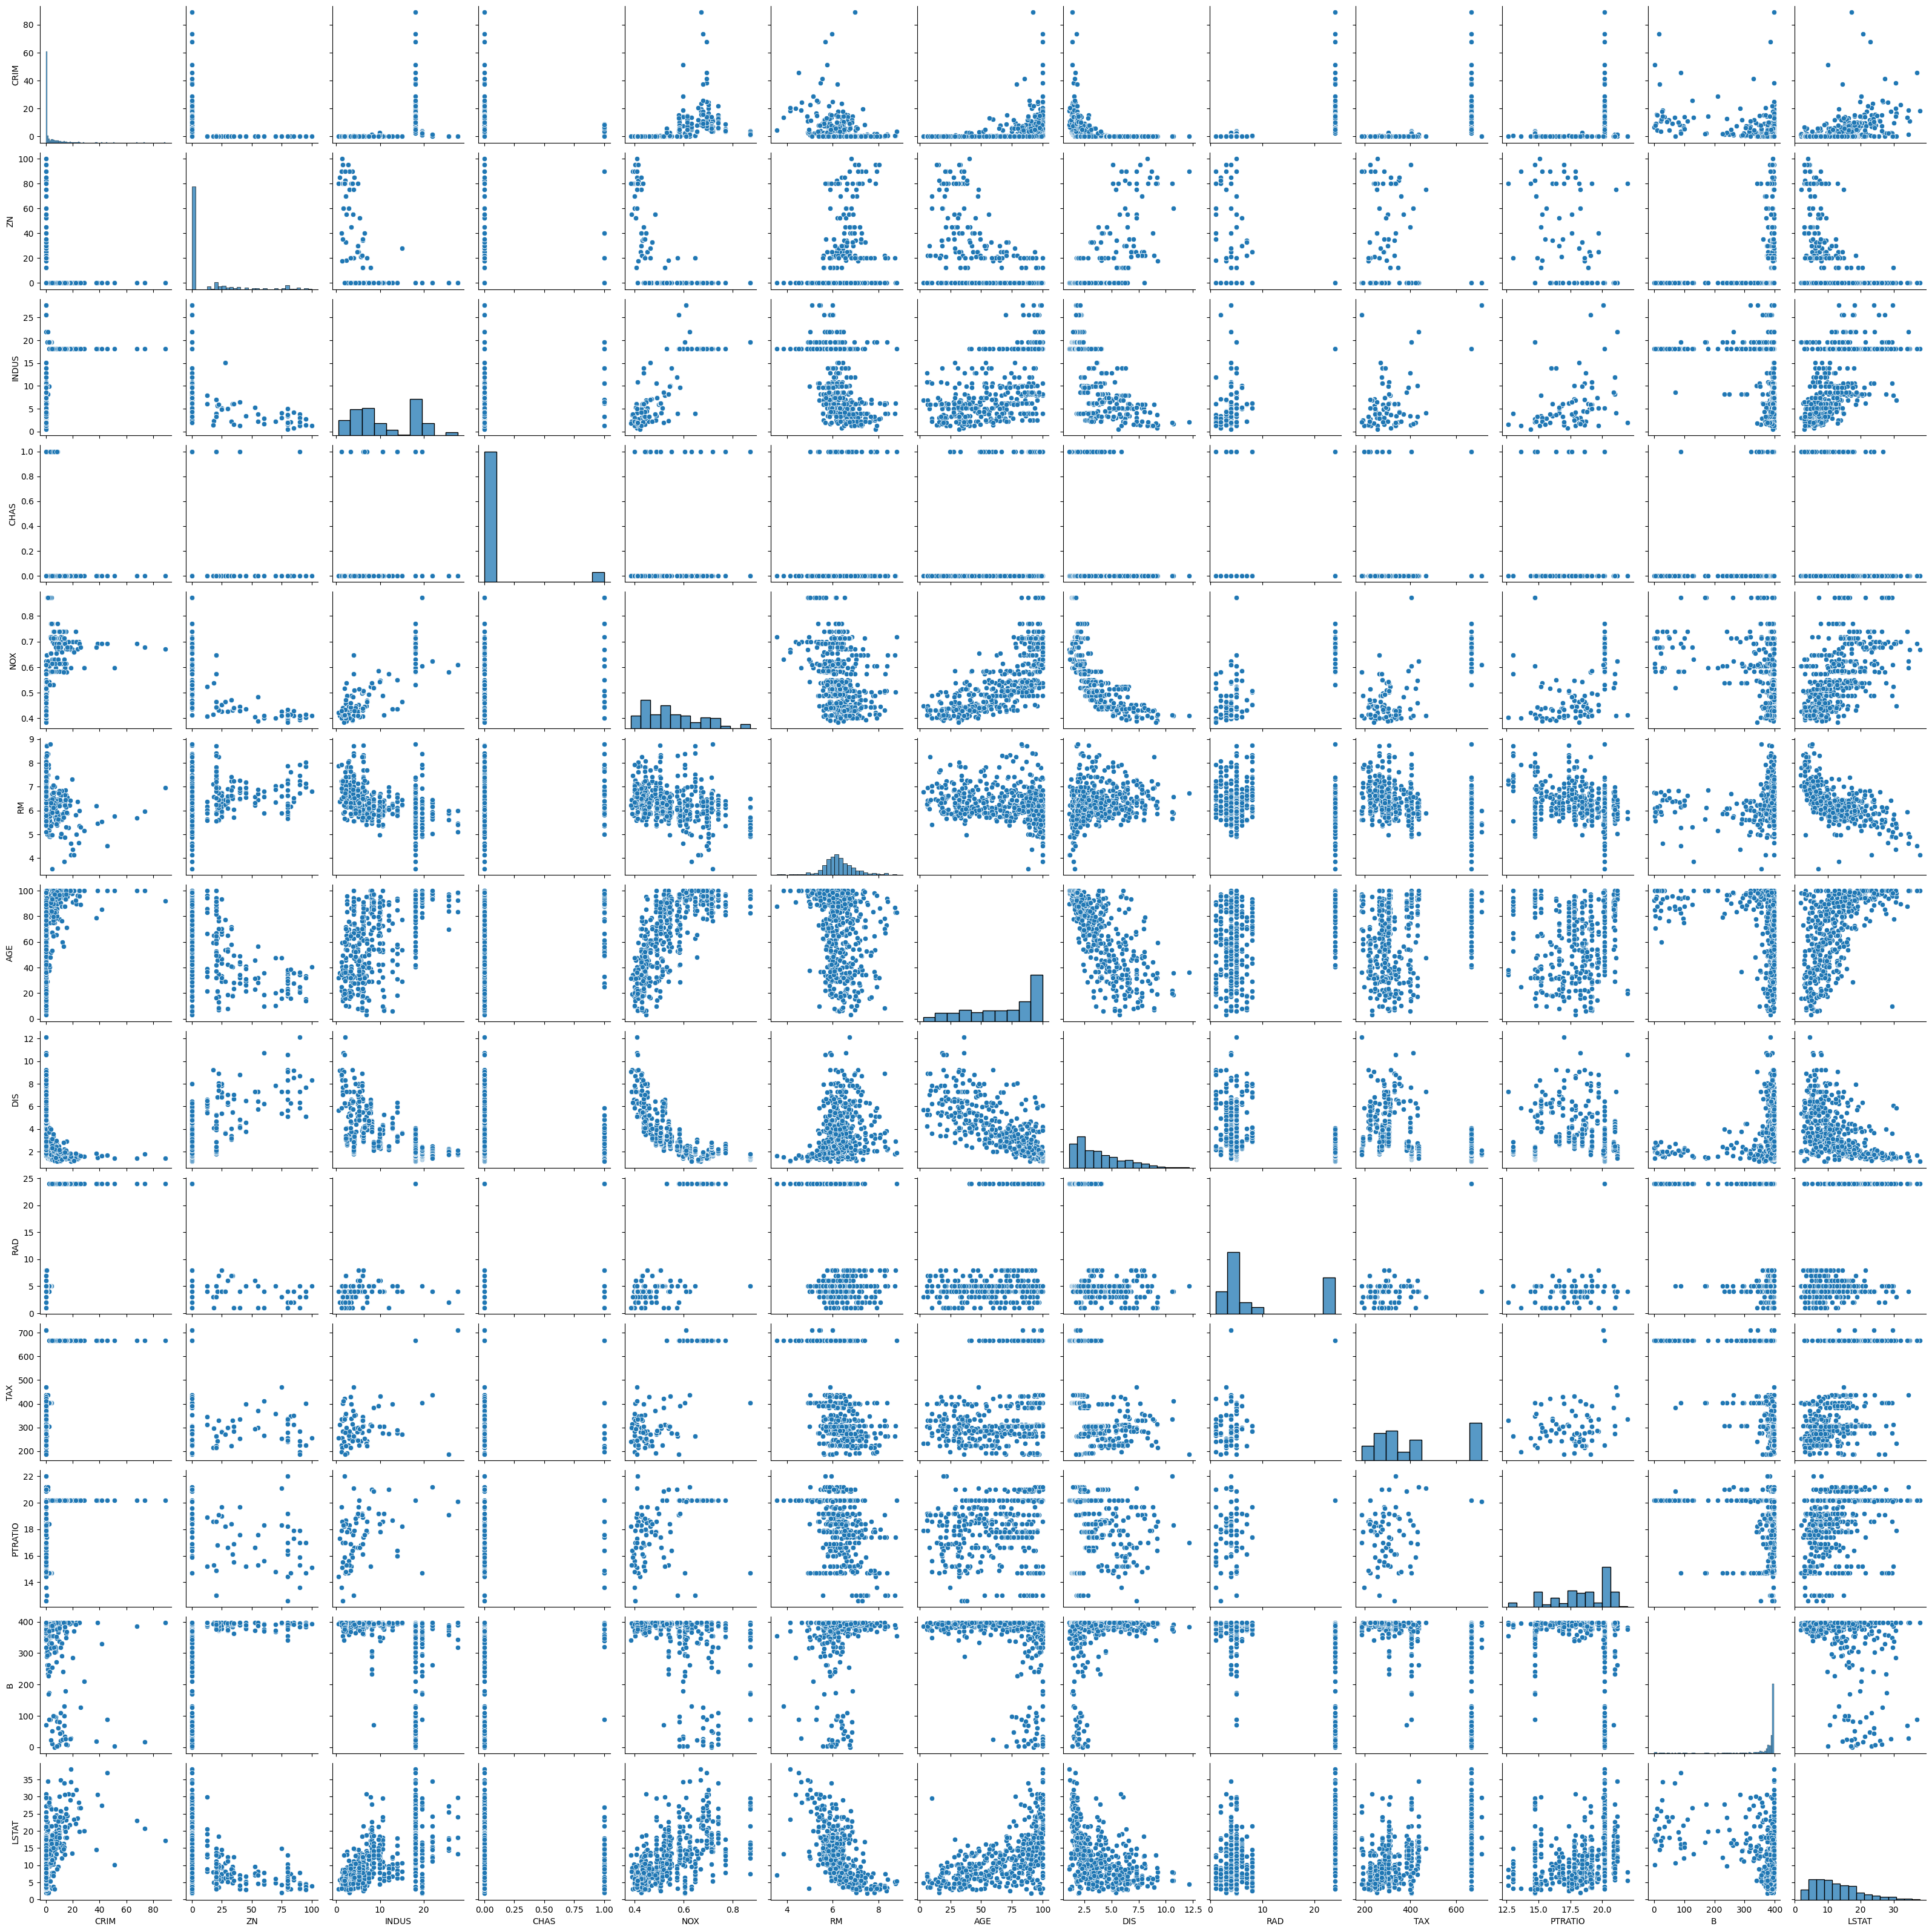

In [18]:
# Cell 6: Data Visualization
# Visualize key relationships between the features and the target variable (price).

# Create pairplots to visualize relationships between features
sns.pairplot(budget_df)
plt.show()

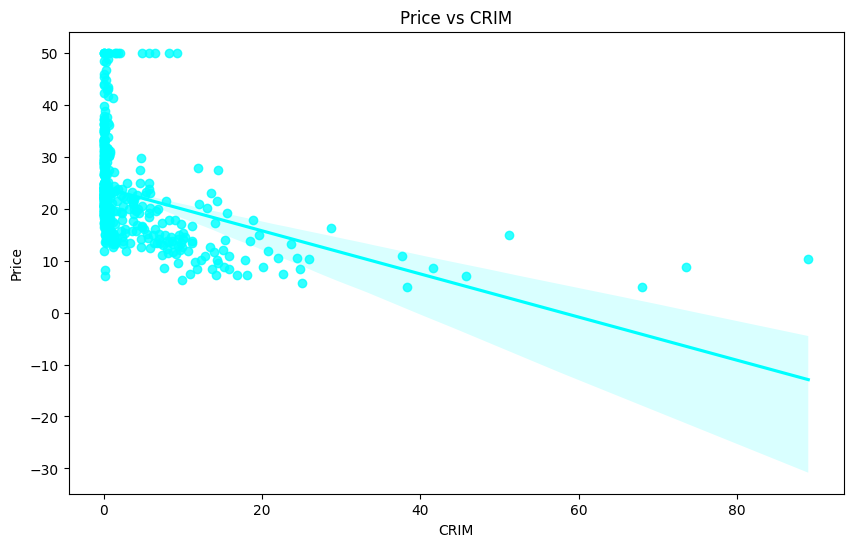

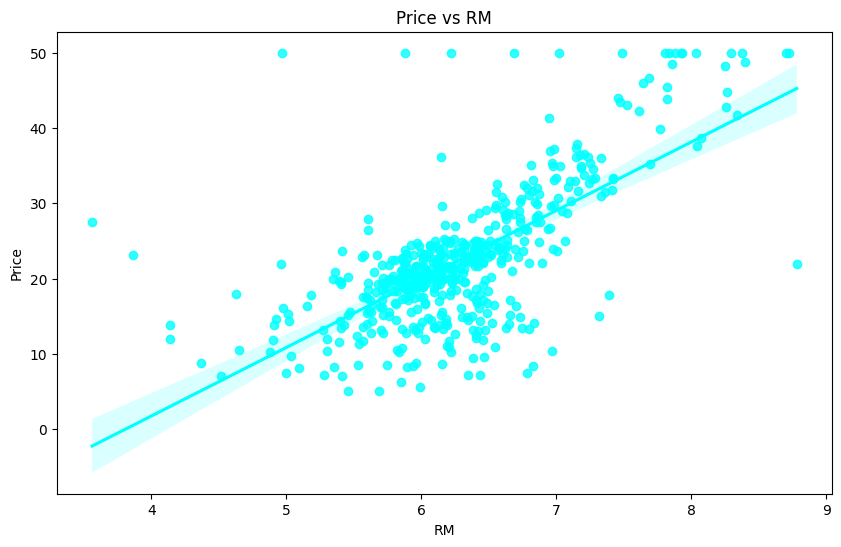

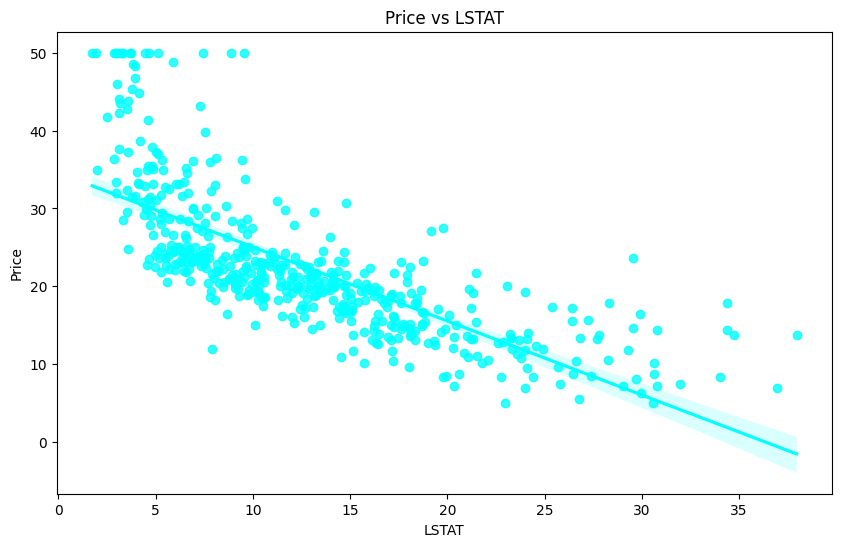

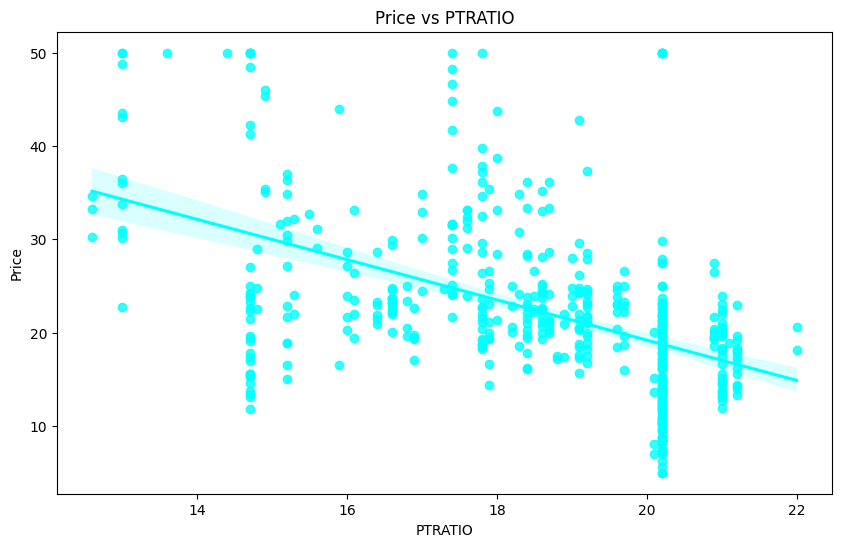

In [19]:
# Plot price vs selected features to analyze their impact
features = ['CRIM', 'RM', 'LSTAT', 'PTRATIO']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=budget_df[feature], y=budget_target, color='aqua')
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

In [20]:
# Cell 7: Outlier Detection
# Detect potential outliers in the dataset using the Interquartile Range (IQR) method.

# Calculate Interquartile Range (IQR)
q1 = budget_stats.iloc[4]  # 25th percentile
q3 = budget_stats.iloc[6]  # 75th percentile
iqr = q3 - q1
print("\nInterquartile Range (IQR):")
print(iqr)



Interquartile Range (IQR):
CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
price        7.975000
dtype: float64


In [21]:
# Calculate the bounds to detect outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print("\nLower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: CRIM        -5.310511
ZN         -18.750000
INDUS      -14.175000
CHAS         0.000000
NOX          0.186500
RM           4.778500
AGE        -28.550000
DIS         -2.532200
RAD        -26.000000
TAX       -301.500000
PTRATIO     13.200000
B          344.106250
LSTAT       -8.057500
price        5.062500
dtype: float64
Upper bound: CRIM          9.069639
ZN           31.250000
INDUS        37.465000
CHAS          0.000000
NOX           0.886500
RM            7.730500
AGE         167.650000
DIS           9.820800
RAD          54.000000
TAX        1246.500000
PTRATIO      24.400000
B           427.496250
LSTAT        31.962500
price        36.962500
dtype: float64


In [24]:
# Cell 8: Data Preprocessing and Model Training
# Split the dataset into training and testing sets, then standardize the features and train the model.

# Split the dataset into features (X) and target (y)
X = budget_df
y = budget_target
print("x",X)
print("y",y)


x         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2      

In [25]:

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
# Initialize the Linear Regression model
model = LinearRegression()

# Perform cross-validation to evaluate model performance on training data
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='neg_mean_squared_error')
cv_scores = -cv_scores  # Convert negative MSE to positive for interpretation
print("\nCross-validation MSE scores:", cv_scores)
print("Mean Cross-validation MSE:", cv_scores.mean())



Cross-validation MSE scores: [15.32823154 25.3030926  37.35430764 28.35987345 19.65129561 20.56371787
 24.83729846]
Mean Cross-validation MSE: 24.485402454421138


In [27]:
# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [28]:

# Cell 9: Model Evaluation
# Evaluate model performance using common regression metrics.

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared calculation
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print evaluation results
print("\nModel Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)


Model Evaluation Metrics:
Mean Squared Error (MSE): 24.291119474973517
Root Mean Squared Error (RMSE): 4.928602182665336
Mean Absolute Error (MAE): 3.1890919658878483
R-squared: 0.668759493535632
Adjusted R-squared: 0.6198262368988503


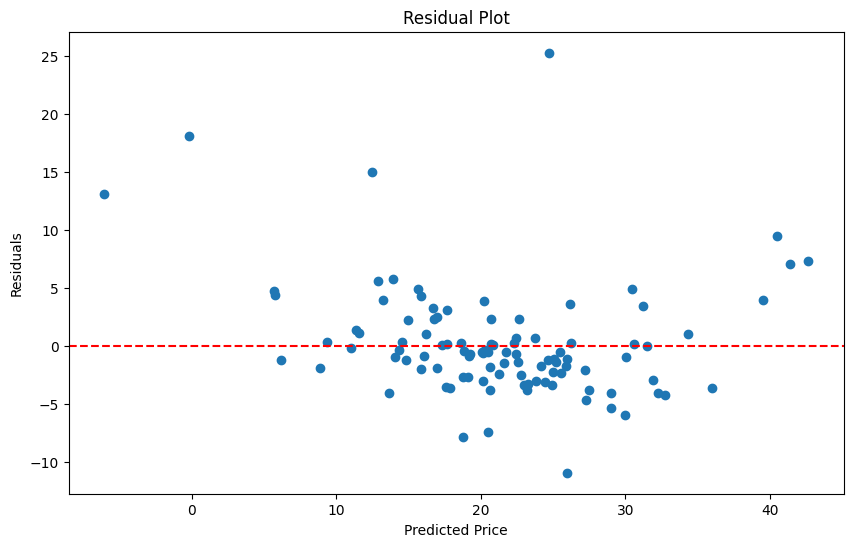

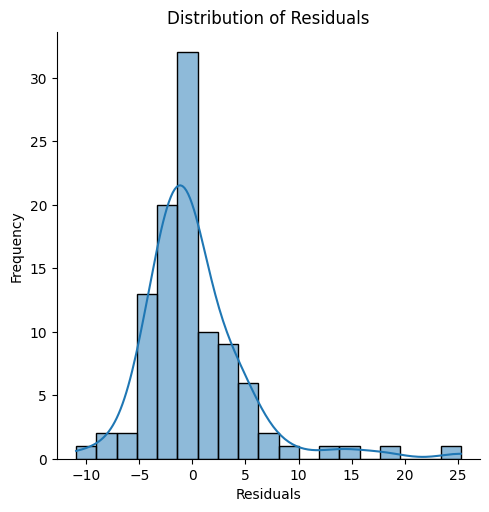

In [29]:


# Cell 10: Residual Analysis
# Analyze residuals to check model performance.

# Calculate residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Plot residuals vs predicted values to detect any patterns
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

# Plot the distribution of residuals to check for normality
sns.displot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


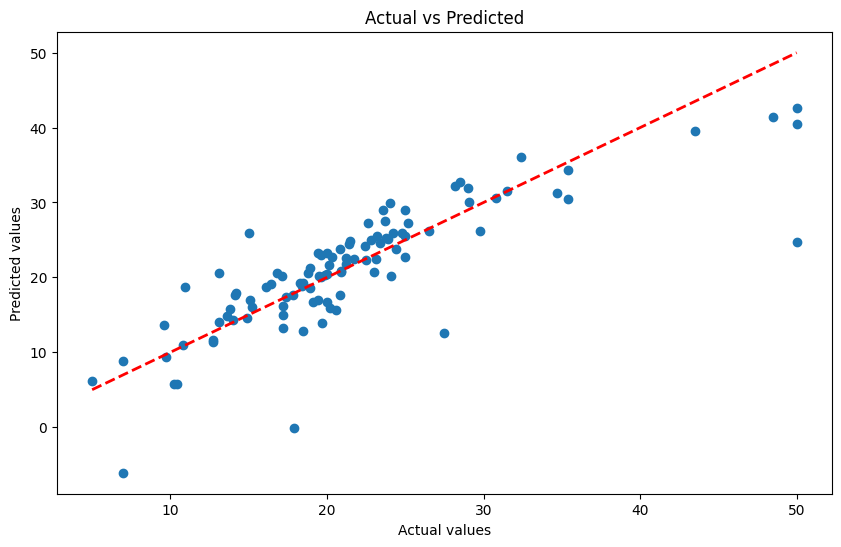

In [30]:
# Cell 11: Actual vs Predicted Plot
# Visualize the relationship between actual and predicted prices.

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.show()

In [31]:

# Cell 12: Prediction on New Data
# Make a prediction using the trained model on new, unseen data.

# Take a sample from the dataset as new data for prediction
new_data = budget_df.iloc[:1].values.reshape(1, -1)
print("\nNew data:", new_data)

# Standardize the new data
new_data_scaled = scaler.transform(new_data)
print("Scaled new data:", new_data_scaled)

# Make a prediction on the new data
predicted_price = model.predict(new_data_scaled)
print("Predicted price:", predicted_price[0])


New data: [[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]
Scaled new data: [[-0.4064505   0.27809835 -1.25979517 -0.27808871 -0.15723342  0.365677
  -0.1200431   0.13239061 -0.97404758 -0.65092617 -1.35597347  0.44418004
  -1.05291444]]
Predicted price: 29.953396377335693


C:\Users\sagar rajak\OneDrive\Desktop\python projects\ml projects\bostonhouseprice_prediction\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
# Cell 13: Save and Load Model
# Save the trained model for future use and demonstrate how to load and use the saved model.

# Save the trained model to a file
joblib.dump(model, 'boston_house_price_prediction.pkl')
print("\nModel saved as 'boston_house_price_prediction.pkl'")

# Load the saved model from the file
loaded_model = joblib.load('boston_house_price_prediction.pkl')
print("Model loaded from 'boston_house_price_prediction.pkl'")

#predict the price
new_data=budget_df.iloc[:1].values.reshape(1,-1)
print("new_data:",new_data)

#scale new data
new_data_scaled=scaler.transform(new_data)
print("new_data_scaled:",new_data_scaled)





# Predict using loaded model
predicted_price = loaded_model.predict(new_data_scaled)
print("Predicted price using loaded model:", predicted_price[0])


Model saved as 'boston_house_price_prediction.pkl'
Model loaded from 'boston_house_price_prediction.pkl'
new_data: [[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]
new_data_scaled: [[-0.4064505   0.27809835 -1.25979517 -0.27808871 -0.15723342  0.365677
  -0.1200431   0.13239061 -0.97404758 -0.65092617 -1.35597347  0.44418004
  -1.05291444]]
Predicted price using loaded model: 29.953396377335693


C:\Users\sagar rajak\OneDrive\Desktop\python projects\ml projects\bostonhouseprice_prediction\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
